# Loading Data

In [1]:
import tensorflow as tf
import numpy as np

from tensorflow.keras.utils import to_categorical

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

np.random.seed(0)
tf.random.set_seed(0)

2024-07-04 07:08:03.392430: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = fetch_openml('hls4ml_lhc_jets_hlf')
X, y = data['data'], data['target']

print(data['feature_names'])
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


['zlogz', 'c1_b0_mmdt', 'c1_b1_mmdt', 'c1_b2_mmdt', 'c2_b1_mmdt', 'c2_b2_mmdt', 'd2_b1_mmdt', 'd2_b2_mmdt', 'd2_a1_b1_mmdt', 'd2_a1_b2_mmdt', 'm2_b1_mmdt', 'm2_b2_mmdt', 'n2_b1_mmdt', 'n2_b2_mmdt', 'mass_mmdt', 'multiplicity']
(830000, 16) (830000,)
      zlogz  c1_b0_mmdt  c1_b1_mmdt  c1_b2_mmdt  c2_b1_mmdt  c2_b2_mmdt  \
0 -2.935125    0.383155    0.005126    0.000084    0.009070    0.000179   
1 -1.927335    0.270699    0.001585    0.000011    0.003232    0.000029   
2 -3.112147    0.458171    0.097914    0.028588    0.124278    0.038487   
3 -2.666515    0.437068    0.049122    0.007978    0.047477    0.004802   
4 -2.484843    0.428981    0.041786    0.006110    0.023066    0.001123   

   d2_b1_mmdt  d2_b2_mmdt  d2_a1_b1_mmdt  d2_a1_b2_mmdt  m2_b1_mmdt  \
0    1.769445    2.123898       1.769445       0.308185    0.135687   
1    2.038834    2.563099       2.038834       0.211886    0.063729   
2    1.269254    1.346238       1.269254       0.246488    0.115636   
3    0.966505  

In [3]:
le = LabelEncoder()
scaler = StandardScaler()

y = le.fit_transform(y)
y = to_categorical(y, 5)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_val = scaler.fit_transform(X_train_val)
X_test = scaler.transform(X_test)

print(X_train_val[:5])
print(y_train_val[:5])

np.save('X_train_val.npy', X_train_val)
np.save('X_test.npy', X_test)
np.save('y_train_val.npy', y_train_val)
np.save('y_test.npy', y_test)
np.save('classes.npy', le.classes_)

[[-0.51121936  0.47090117  0.38540931  0.07026399 -0.04159453 -0.1419771
  -0.86861754 -0.55332437 -0.86861754 -0.78398404 -0.80951885 -0.84826608
  -0.96489331 -0.8356734   0.18723389  0.46561524]
 [ 0.7483717  -0.49861702  0.12397022  0.03641154  0.56179779  0.06696305
   0.72380229 -0.09968861  0.72380229 -0.51549956 -0.65733668 -0.50218422
  -0.19640946 -0.43477071  0.26307061 -0.87207752]
 [ 0.85495536 -0.90714665 -1.21856616 -0.8492167  -1.10534118 -0.62386691
  -0.02941125  0.19693803 -0.02941125  0.91224942  1.13528454  1.70798881
   0.96385777  1.37856206 -1.28941714 -0.73369551]
 [ 1.29115032 -1.08750797 -1.2036294  -0.84852698 -1.10527116 -0.62384415
  -0.4787448  -0.29504078 -0.4787448   0.31968142  0.90666638  1.60355454
   0.42341915  0.79754795 -1.27815802 -1.14884154]
 [-0.31972133  0.57874781 -0.09066509 -0.04405296  0.71995408  0.73253538
   1.73682886  1.50311573  1.73682886 -0.70346468 -1.06769723 -1.01575622
  -0.38546518 -0.47647934  0.27527304 -0.27242214]]
[[0. 

# Standard Model

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1
from callbacks import all_callbacks

In [5]:
model = Sequential()
model.add(Dense(64, input_shape=(16,), name='fc1', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='relu', name='relu1'))
model.add(Dense(32, name='fc2', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='relu', name='relu2'))
model.add(Dense(32, name='fc3', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='relu', name='relu3'))
model.add(Dense(5, name='output', kernel_initializer='lecun_uniform', kernel_regularizer=l1(0.0001)))
model.add(Activation(activation='softmax', name='softmax'))

2024-07-04 07:09:04.930065: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
train = False
if train:
    adam = Adam(lr=0.0001)
    model.compile(optimizer=adam, loss=['categorical_crossentropy'], metrics=['accuracy'])
    callbacks = all_callbacks(
        stop_patience=1000,
        lr_factor=0.5,
        lr_patience=10,
        lr_epsilon=0.000001,
        lr_cooldown=2,
        lr_minimum=0.0000001,
        outputDir='baseline_model',
    )
    model.fit(
        X_train_val,
        y_train_val,
        batch_size=1024,
        epochs=30,
        validation_split=0.25,
        shuffle=True,
        callbacks=callbacks.callbacks,
    )
else:
    from tensorflow.keras.models import load_model

    model = load_model('baseline_model/KERAS_check_best_model.h5')

# Quantized Pruned Model

In [7]:
from qkeras.qlayers import QDense, QActivation
from qkeras.quantizers import quantized_bits, quantized_relu

In [8]:
quant_prune_model = Sequential()
quant_prune_model.add(
    QDense(
        64,
        input_shape=(16,),
        name='fc1',
        kernel_quantizer=quantized_bits(6, 0, alpha=1),
        bias_quantizer=quantized_bits(6, 0, alpha=1),
        kernel_initializer='lecun_uniform',
        kernel_regularizer=l1(0.0001),
    )
)
quant_prune_model.add(QActivation(activation=quantized_relu(6), name='relu1'))
quant_prune_model.add(
    QDense(
        32,
        name='fc2',
        kernel_quantizer=quantized_bits(6, 0, alpha=1),
        bias_quantizer=quantized_bits(6, 0, alpha=1),
        kernel_initializer='lecun_uniform',
        kernel_regularizer=l1(0.0001),
    )
)
quant_prune_model.add(QActivation(activation=quantized_relu(6), name='relu2'))
quant_prune_model.add(
    QDense(
        32,
        name='fc3',
        kernel_quantizer=quantized_bits(6, 0, alpha=1),
        bias_quantizer=quantized_bits(6, 0, alpha=1),
        kernel_initializer='lecun_uniform',
        kernel_regularizer=l1(0.0001),
    )
)
quant_prune_model.add(QActivation(activation=quantized_relu(6), name='relu3'))
quant_prune_model.add(
    QDense(
        5,
        name='output',
        kernel_quantizer=quantized_bits(6, 0, alpha=1),
        bias_quantizer=quantized_bits(6, 0, alpha=1),
        kernel_initializer='lecun_uniform',
        kernel_regularizer=l1(0.0001),
    )
)
quant_prune_model.add(Activation(activation='softmax', name='softmax'))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [9]:
from tensorflow_model_optimization.python.core.sparsity.keras import prune, pruning_callbacks, pruning_schedule
from tensorflow_model_optimization.sparsity.keras import strip_pruning

pruning_params = {"pruning_schedule": pruning_schedule.ConstantSparsity(0.75, begin_step=2000, frequency=100)}
quant_prune_model = prune.prune_low_magnitude(model, **pruning_params)

In [10]:
train = False
if train:
    adam = Adam(lr=0.0001)
    model.compile(optimizer=adam, loss=['categorical_crossentropy'], metrics=['accuracy'])
    callbacks = all_callbacks(
        stop_patience=1000,
        lr_factor=0.5,
        lr_patience=10,
        lr_epsilon=0.000001,
        lr_cooldown=2,
        lr_minimum=0.0000001,
        outputDir='quant_prune_model',
    )
    callbacks.callbacks.append(pruning_callbacks.UpdatePruningStep())
    model.fit(
        X_train_val,
        y_train_val,
        batch_size=1024,
        epochs=30,
        validation_split=0.25,
        shuffle=True,
        callbacks=callbacks.callbacks,
    )
    # Save the model again but with the pruning 'stripped' to use the regular layer types
    model = strip_pruning(model)
    model.save('quant_prune_model/BEST_MODEL.h5')
else:
    from tensorflow.keras.models import load_model
    from qkeras.utils import _add_supported_quantized_objects

    co = {}
    _add_supported_quantized_objects(co)
    model = load_model('quant_prune_model/KERAS_check_best_model.h5', custom_objects=co)

# Comparison

5188/5188 [==============================] - 9s 2ms/step
Accuracy baseline:  0.7650120481927711
Accuracy pruned, quantized: 0.7641566265060241


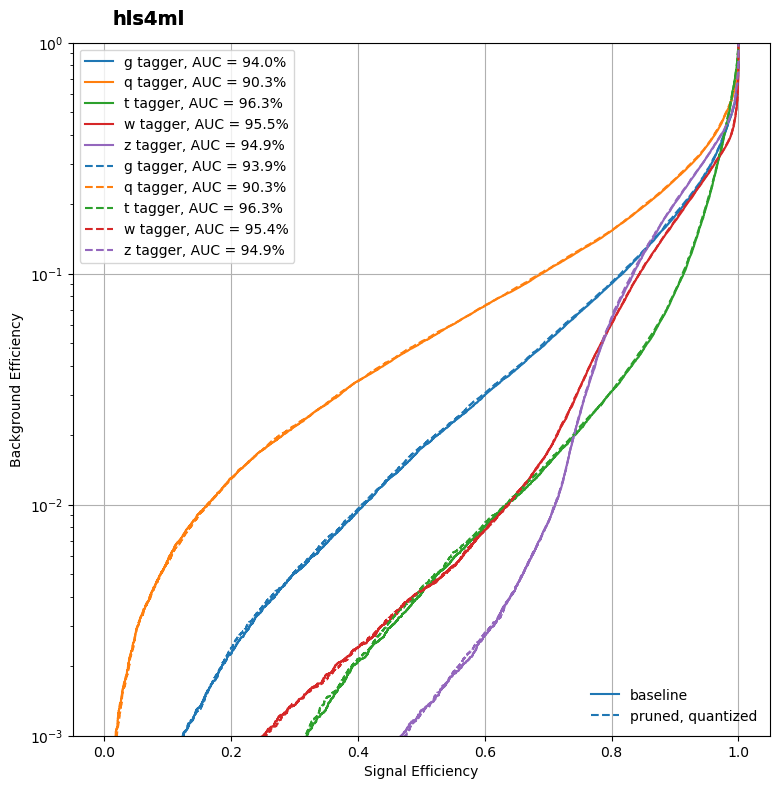

In [11]:
%matplotlib inline

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.legend import Legend

import plotting

y_baseline = model.predict(X_test)
y_qkeras = quant_prune_model.predict(X_test)

print("Accuracy baseline:  {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_baseline, axis=1))))
print("Accuracy pruned, quantized: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_qkeras, axis=1))))

fig, ax = plt.subplots(figsize=(9, 9))
_ = plotting.makeRoc(y_test, y_baseline, le.classes_)
plt.gca().set_prop_cycle(None)  # reset the colors
_ = plotting.makeRoc(y_test, y_qkeras, le.classes_, linestyle='--')

lines = [Line2D([0], [0], ls='-'), Line2D([0], [0], ls='--')]

leg = Legend(ax, lines, labels=['baseline', 'pruned, quantized'], loc='lower right', frameon=False)
ax.add_artist(leg)

# HLS4ML Conversion

In [12]:
import sys
import os

local_module_dir = os.path.join("/home/jovyan/work/hls4ml") # This should be changed the path of the local modified version of HLS4ML containing Vitis Accel backend
sys.path.insert(0, local_module_dir)

import hls4ml

config = hls4ml.utils.config_from_keras_model(model, granularity='name')
config['LayerName']['softmax']['exp_table_t'] = 'ap_fixed<18,8>'
config['LayerName']['softmax']['inv_table_t'] = 'ap_fixed<18,4>'

print("-----------------------------------")
plotting.print_dict(config)
print("-----------------------------------")

hls_model = hls4ml.converters.convert_from_keras_model(
    model,
    hls_config=config,
    output_dir='vitis_accel_prj',
    backend='VitisAccelerator',
    board='alveo-u55c',
    num_kernel=4,
    num_thread=8,
    batchsize=8192,
    vivado_directives=["prop=run.impl_1.STEPS.PLACE_DESIGN.ARGS.DIRECTIVE=Explore"]
)
hls_model.compile()

/home/jovyan/work/hls4ml/hls4ml/converters/__init__.py:27: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!", stacklevel=1)


Interpreting Sequential
Topology:
Layer name: fc1_input, layer type: InputLayer, input shapes: [[None, 16]], output shape: [None, 16]
Layer name: fc1, layer type: Dense, input shapes: [[None, 16]], output shape: [None, 64]
Layer name: relu1, layer type: Activation, input shapes: [[None, 64]], output shape: [None, 64]
Layer name: fc2, layer type: Dense, input shapes: [[None, 64]], output shape: [None, 32]
Layer name: relu2, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: fc3, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: relu3, layer type: Activation, input shapes: [[None, 32]], output shape: [None, 32]
Layer name: output, layer type: Dense, input shapes: [[None, 32]], output shape: [None, 5]
Layer name: softmax, layer type: Softmax, input shapes: [[None, 5]], output shape: [None, 5]
-----------------------------------
Model
  Precision:         fixed<16,6>
  ReuseFactor:       1
  Strategy:          Latency


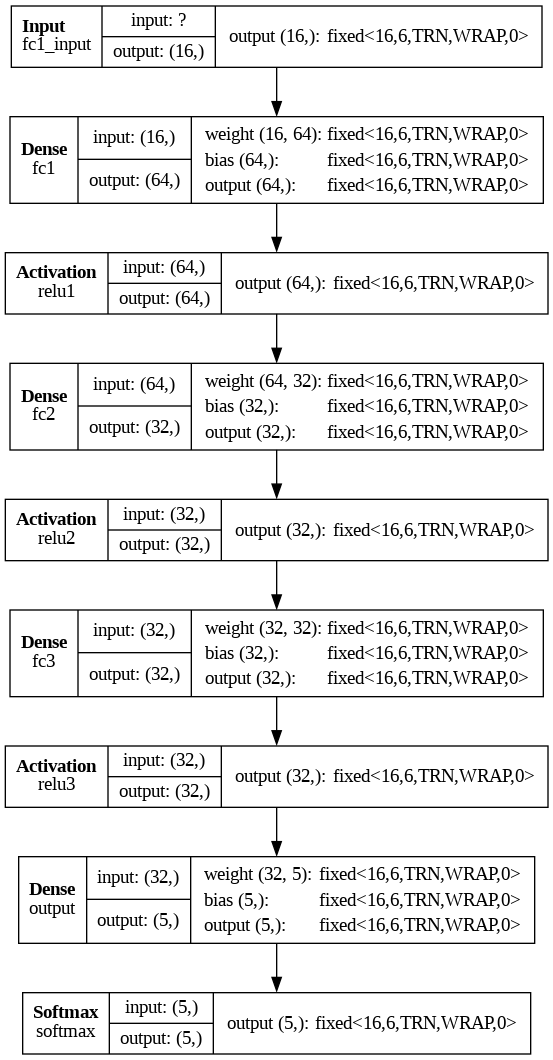

In [13]:
hls4ml.utils.plot_model(hls_model, show_shapes=True, show_precision=True, to_file=None)

In [14]:
# y_hlw_hw = hls_model.hardware_predict(X_test) # Requires Vitis Command Line tool to be set-up

from hls4ml.backends.vitis_accelerator.vitis_accelerator_backend import VitisAcceleratorBackend

VitisAcceleratorBackend.numpy_to_dat(hls_model.config.backend, hls_model, X_test)
y_hls_hw = VitisAcceleratorBackend.dat_to_numpy(hls_model.config.backend, hls_model)

Accuracy baseline:  0.7650120481927711
Accuracy pruned, quantized: 0.7641566265060241
Accuracy hls4ml: 0.7652168674698795


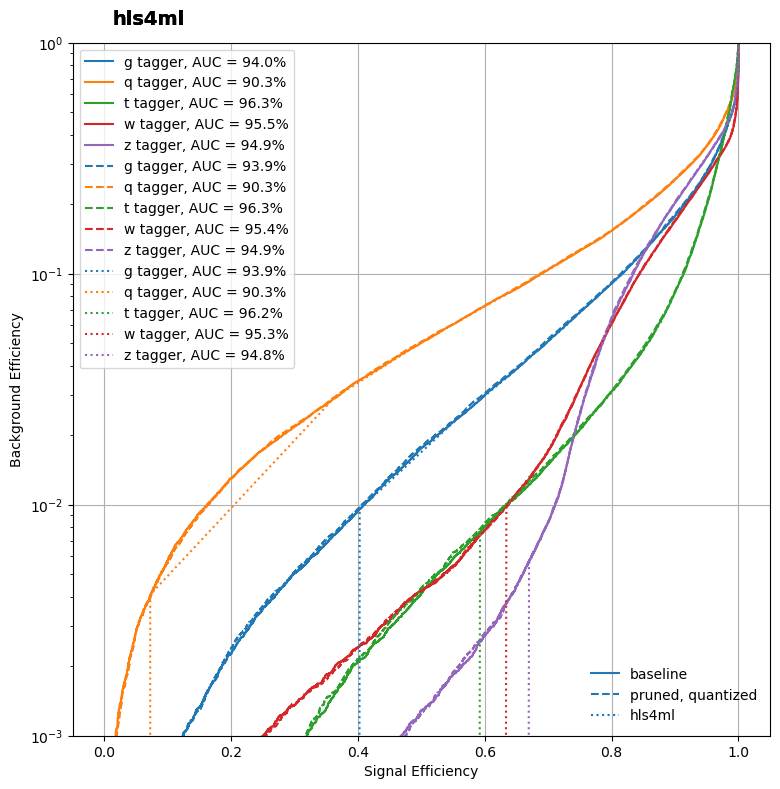

In [15]:
%matplotlib inline

print("Accuracy baseline:  {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_baseline, axis=1))))
print("Accuracy pruned, quantized: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_qkeras, axis=1))))
print("Accuracy hls4ml: {}".format(accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_hls_hw, axis=1))))

fig, ax = plt.subplots(figsize=(9, 9))
_ = plotting.makeRoc(y_test, y_baseline, le.classes_)
plt.gca().set_prop_cycle(None)  # reset the colors
_ = plotting.makeRoc(y_test, y_qkeras, le.classes_, linestyle='--')
plt.gca().set_prop_cycle(None)  # reset the colors
_ = plotting.makeRoc(y_test, y_hls_hw, le.classes_, linestyle=':')


lines = [Line2D([0], [0], ls='-'), Line2D([0], [0], ls='--'), Line2D([0], [0], ls=':')]

leg = Legend(ax, lines, labels=['baseline', 'pruned, quantized', 'hls4ml'], loc='lower right', frameon=False)
ax.add_artist(leg)